In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# 1. Boundary fill

In [6]:
fatshark = cv.imread('picture/3.jpg')

top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

# Method 1: replicate method
fatshark_replicate = cv.copyMakeBorder(fatshark, top_size, bottom_size, left_size, right_size, borderType=cv.BORDER_REPLICATE)

# Method 2.1: reflect method
fatshark_reflect_1 = cv.copyMakeBorder(fatshark, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT)
# Method 2.2: reflect method (Not the most marginal pixel, 101)
fatshark_reflect_2 = cv.copyMakeBorder(fatshark, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT_101)

# Method 3: wrap method
fatshark_wrap = cv.copyMakeBorder(fatshark, top_size, bottom_size, left_size, right_size, borderType=cv.BORDER_WRAP)

# Method 4: constant method
fatshark_constant = cv.copyMakeBorder(fatshark, top_size, bottom_size, left_size, right_size, cv.BORDER_CONSTANT, value=0)

(<Axes: title={'center': 'CONSTAVI'}>,
 Text(0.5, 1.0, 'CONSTAVI'))

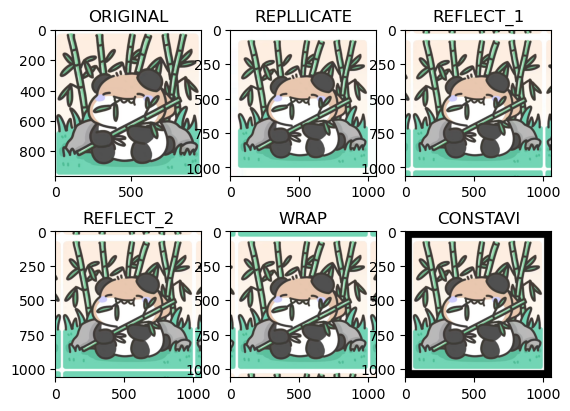

In [7]:
plt.subplot(231), plt.imshow(fatshark, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(fatshark_replicate, 'gray'), plt.title('REPLLICATE')
plt.subplot(233), plt.imshow(fatshark_reflect_1, 'gray'), plt.title('REFLECT_1')
plt.subplot(234), plt.imshow(fatshark_reflect_2, 'gray'), plt.title('REFLECT_2')
plt.subplot(235), plt.imshow(fatshark_wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(fatshark_constant, 'gray'), plt.title('CONSTAVI')

# 2. Threshold out of bounds handling

In [13]:
fatshark = cv.imread('picture/3.jpg')
fatshark_1 = fatshark + 10

print(fatshark[:5,:,0])
print(fatshark_1[:5,:,0])
print((fatshark+fatshark_1)[:5,:,0])
print(cv.add(fatshark,fatshark_1)[:5,0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]
 [9 9 9 ... 9 9 9]]
[[8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


# 3. Image fusion

In [15]:
fatshark = cv.imread('picture/3.jpg')
sleeping = cv.imread('picture/4.jpg')
print(fatshark.shape)
print(sleeping.shape)

(960, 960, 3)
(960, 960, 3)


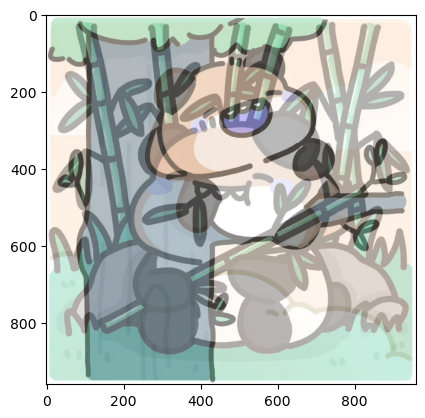

In [16]:
fusion = cv.addWeighted(fatshark,0.4,sleeping,0.6,0)
plt.imshow(fusion)

# 4. Image scaling

(<Axes: title={'center': 'Unequal scaling'}>,
 Text(0.5, 1.0, 'Unequal scaling'))

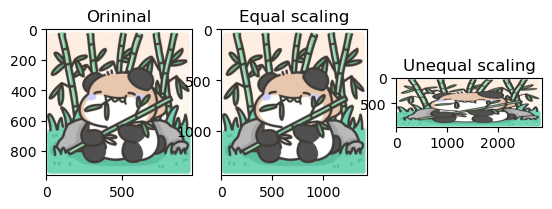

In [23]:
fatshark = cv.imread('picture/3.jpg')
fatshark_scaling_1 = cv.resize(fatshark,(0,0),fx=1.5,fy=1.5)
fatshark_scaling_2 = cv.resize(fatshark,(0,0),fx=3,fy=1)
plt.subplot(131),plt.imshow(fatshark),plt.title('Orininal')
plt.subplot(132),plt.imshow(fatshark_scaling_1),plt.title('Equal scaling')
plt.subplot(133),plt.imshow(fatshark_scaling_2),plt.title('Unequal scaling')

# 5. Image thresholds

127.0 127.0 127.0 127.0 127.0


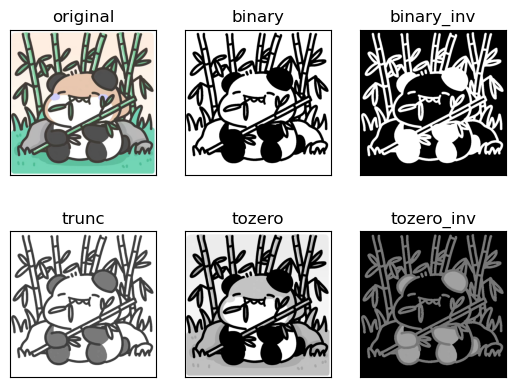

In [27]:
fatshark = cv.imread('picture/3.jpg',cv.IMREAD_COLOR)
fatshark_gray = cv.imread('picture/3.jpg',cv.IMREAD_GRAYSCALE)

ret1, thresh1 = cv.threshold(fatshark_gray,127,255,cv.THRESH_BINARY) # The threshold is exceeded by maxval, otherwise it is 0
ret2, thresh2 = cv.threshold(fatshark_gray,127,255,cv.THRESH_BINARY_INV)
ret3, thresh3 = cv.threshold(fatshark_gray,127,255,cv.THRESH_TRUNC) # Greater than threshold set to threshold, otherwise unchanged
ret4, thresh4 = cv.threshold(fatshark_gray,127,255,cv.THRESH_TOZERO) # No change above the threshold, otherwise set to 0
ret5, thresh5 = cv.threshold(fatshark_gray,127,255,cv.THRESH_TOZERO_INV)

print(ret1,ret2,ret3,ret4,ret5)

titles = ['original','binary','binary_inv','trunc','tozero','tozero_inv']
images = [fatshark, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 6. Noise

## 6.1 Gaussian noise

In [33]:
fatshark = cv.imread('picture/3.jpg')
mean = 0
sigma = 25 # Standard deviation
gauss = np.random.normal(mean, sigma, (960, 960, 3))
fatshark_gaussian_noise = fatshark + gauss
fatshark_gaussian_noise = np.clip(fatshark_gaussian_noise,a_min=0,a_max=255)
cv.imwrite('picture/fatshark_gaussion_noise.jpg', fatshark_gaussian_noise)

True

## 6.2 salt-and-pepper Noise

In [50]:
fatshark = cv.imread('picture/3.jpg')
s_vs_p = 0.5 # salt:pepper
amount = 0.04 # Add the number of noisy image pixels

fatshark_sp_noise = np.copy(fatshark)

num_salt = np.ceil(amount * fatshark.size * s_vs_p)
coords = [np.random.randint(0,i-1,int(num_salt)) for i in fatshark.shape]
fatshark_sp_noise[coords[0],coords[1],:] = [255,255,255]

num_pepper = np.ceil(amount * fatshark.size * (1. - s_vs_p))
coords = [np.random.randint(0,i-1,int(num_pepper)) for i in fatshark.shape]
fatshark_sp_noise[coords[0],coords[1],:] = [0,0,0]

cv.imwrite('picture/fatshark_sp_noise.jpg', fatshark_sp_noise)

True

## 6.3 Poisson noise

In [51]:
fatshark = cv.imread('picture/3.jpg')
vals = len(np.unique(fatshark))
vals = 2 * np.ceil(np.log2(vals))
fatshark_poisson_noise = np.random.poisson(fatshark * vals) / float(vals)
cv.imwrite('picture/fatshark_poisson_noise.jpg', fatshark_poisson_noise)

True

## 6.4 Speckle noise

In [52]:
fatshark = cv.imread('picture/3.jpg')
gauss = np.random.randn(960,960,3)
fatshark_speckle_noise = fatshark + fatshark * gauss
fatshark_speckle_noise = np.clip(fatshark_speckle_noise,a_min=0,a_max=255)
cv.imwrite('picture/fatshark_speckle_noise.jpg', fatshark_speckle_noise)

True

# 7. Filtering

## 7.1 Mean value filtering

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


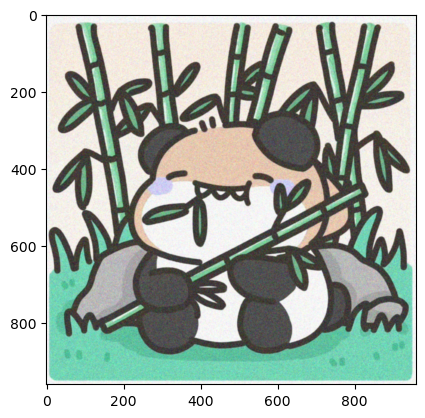

In [73]:
# The values in the boxes are added together and averaged, replacing the centre value
fatshark_gaussion_noise = cv.imread('picture/fatshark_gaussion_noise.jpg')
blur = cv.blur(fatshark_gaussian_noise/255,(3,3)) # (3,3) is the size of the kernel
plt.imshow(blur)

## 7.2 Box filtering

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: >, <matplotlib.image.AxesImage at 0x214c452de10>)

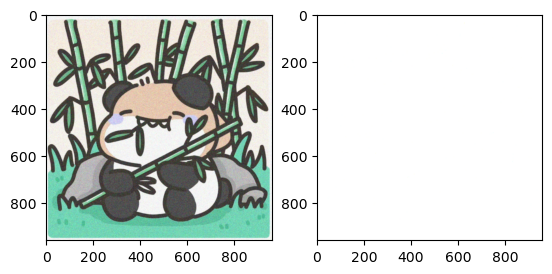

In [83]:
box_1 = cv.boxFilter(fatshark_gaussion_noise,-1,(3,3),normalize=True) # -1 indicates the value corresponding to adaptive padding
box_2 = cv.boxFilter(fatshark_gaussian_noise,-1,(3,3),normalize=False) # The out-of-bounds value is taken as 255
plt.subplot(121),plt.imshow(box_1)
plt.subplot(122),plt.imshow(box_2)